<a href="https://colab.research.google.com/github/molnaredom/gepitan/blob/main/Moln%C3%A1r_%C3%81d%C3%A1m_R4SZ90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. feladat

Az https://github.com/rfarkas/student_data/raw/main/images/500faces.zip fájl arcképeket tartalmaz. Hajts végre gépi tanulási kísérletet arra nézve, hogy az életkor mennyire jól állapítható meg képek alapján! A fájlok nevének első `_` előtti része tartalmazza az igazi életkort. Használd a képek véletlenszerű 20%-át kiértékelő adatbázisnak.

Érdemes a képeket kisebbre átméretezni, esetleg szürkeárnyalossá konvertálni, hogy gyorsabban lehessen kísérletezni.


In [51]:
#letöltjük a képfájlokat
import os
import urllib.request 
#az eredeti adatbázisból 515 képet kiemeltem, hogy pillanatok alatt fusson a kód
url = 'https://github.com/rfarkas/student_data/raw/main/images/500faces.zip'
urllib.request.urlretrieve(url,'t.zip') #a t.zip a temporálisan notebookhoz rendelt tárhelyre kerül a Google felhőjében

#kitömörítjük a zip tartalmát
import zipfile
zipfile.ZipFile('t.zip').extractall('tmp_imgs')


In [ ]:
#egyenméretezés ezen dolgoztam éppen hogy beletegyem de nem volt idő
#image_small = cv.resize(image,(32,32)) # 32 x 32 méretűre konvertáljuk a képet
#plt.imshow(cv.cvtColor(image_small,cv.COLOR_BGR2RGB))

JPEG
RGB
(200, 200)


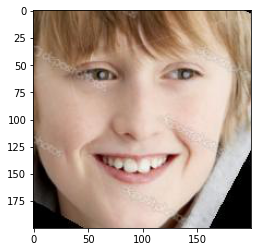

In [56]:
# egy kép beolvasása
# load and show an image with Pillow
import matplotlib.pyplot as plt
from PIL import Image
# load the image
image = Image.open('tmp_imgs/10_0_0_20170110220530650.jpg.chip.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()
plt.imshow(image)

images = [files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

In [53]:
# életkor vektor kinyerése
from os import listdir
from os.path import isfile, join
mypath  = "tmp_imgs/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

eletkor_vektor = []

for filenev in onlyfiles:
  sp = filenev.split("_")
  eletkor_vektor.append(sp[0])


In [45]:
# az össes kép beolvasása
import cv2
import glob

imdir = 'tmp_imgs/'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]


In [48]:
# adatok szétválasztása traire és tesztre
from sklearn.model_selection import train_test_split
trainFeatures, testFeatures, trainLables, testLables = train_test_split(images, 
                                                                        eletkor_vektor, 
                                                                        test_size=0.20, 
                                                                        random_state=42)
# az a baj hogy amit kap adatot rosszul van beolvasva, mert minden kép egy nagy dimenziójú tömbben van
# ezért később nem tudjuk illeszteni ,fit elni a modelt mert a dimenziók szám kisebb kell hogy legyen mint 3

In [ ]:
# a rossz dimenziokra megoldas lehet
nsamples, nx, ny = train_dataset.shape
d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))

In [54]:
# modell elkészítése

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15) 


from sklearn.metrics import accuracy_score
model.fit(trainFeatures, trainLables)
prediction = model.predict(testFeatures)
accuracy_score(y_true=testLables, y_pred=prediction)

ValueError: ignored

# 2. feladat
Próbálj ki egy másik regressziós algoritmust/megközelítést is az 1. feladatra. Mindkettőnek hangold be a meta-paraméterit. (bónus feladat: a meta-paraméter értékekre a túltanási ábra kirajzolása)

A végén szövegként írd le, hogy a két algoritmus/megközelítés közül melyiket tekinted jobbnak!


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # lineáris gép regresszióra
reg.fit(trainFeatures, trainLabels)
prediction = reg.predict(testFeatures)

In [ ]:
#Paraméter hangolás + kirajzolás ---> knn # megnézni melyik szomszédszám a legjobb
from sklearn.neighbors import KNeighborsClassifier
valid_f1=[]
train_f1=[]
for k in range(1,40,1): # páratlan k értékek
  knn = KNeighborsClassifier(n_neighbors=k) # kNN különböző k értékekkel
  knn.fit(train_features, train_classlabels)  
  valid_prediction = knn.predict(valid_features)
  valid_f1.append(f1_score(valid_classlabels, valid_prediction, pos_label=1))
  train_prediction = knn.predict(train_features)
  train_f1.append(f1_score(train_classlabels, train_prediction, pos_label=1))

### kiiratas
plt.figure(figsize=(10,10))
plt.plot(valid_f1, c="green")
plt.plot(train_f1, c="red")

In [ ]:
# Paraméter hangolás lineáris regresszió # l értékeket próbálgatuk
from sklearn.linear_model import LogisticRegression
valid_f1=[]
train_f1=[]
for l in range(-7,5):
  lin = LogisticRegression(random_state=0, 
                           max_iter=10000, # nehéz feladat a lineáris gépnek, engedjük a defaultnál tovább tanulni
                           class_weight="balanced", # tanulásnál átsúlyozzuk a ritka osztálycímkéket, ez sokat segít lineáris gépeknél
                           C=10**l) # regularizációs együttható 
  lin.fit(train_features, train_classlabels)  
  valid_prediction = lin.predict(valid_features)
  valid_f1.append(f1_score(valid_classlabels, valid_prediction, pos_label=1))
  train_prediction = lin.predict(train_features)
  train_f1.append(f1_score(train_classlabels, train_prediction, pos_label=1))

#kirajzolás
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(valid_f1, c="green")
plt.plot(train_f1, c="red")

# aza jó ahol a zöld a legmagasabb mert az a validációs halamazon ott érünk el legjobb teljesítménít
# nekünk 

# 3. feladat
Készíts egy 2D ábrát, ami segít megérteni a modell működését! Ehhez jeleníts meg néhány képet a kiértékelő halmazról, úgy hogy a predikált életkor legyen az y, míg az igazi életkor az x koordináta.